In [54]:
import numpy as np
from math import factorial
import random
import matplotlib.pyplot as plt
import statistics
import pandas as pd

### Уровень 0

#### Задание 1

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов (решение на бумажке и на python).

Воспользуемся формулой Бернулли:

$ P_k^n=C_k^n \cdot p^k \cdot q^{n-k}$,   

где   

$C_k^n =  \frac {n!}{k! \cdot (n-k)!}$

Найдем вероятность того, что выпадет простое число: 2, 3, 5, 7, 11, 13 (6 шт)

Для монетки $p = 0.5 $ и $q = 0.5$. 

Тогда: $p=q$, получим:  

$ P_k^n=C_k^n \cdot p^n $

$p^n$ можно будет в итоговой сумме вынести за скобки

$C_{15}^{2} =  \frac {15!}{2! \cdot (15-2)!} = \frac {15!}{2! \cdot 13!} = \frac {14 \cdot 15}{1 \cdot 2} = 105$

$C_{15}^{3} =  \frac {15!}{3! \cdot (15-3)!} = \frac {15!}{3! \cdot 12!} = \frac {13 \cdot 14 \cdot 15 }{1 \cdot 2 \cdot 3} = 455$

$C_{15}^{5} =  \frac {15!}{5! \cdot (15-5)!} = \frac {15!}{5! \cdot 10!} = \frac { 11 \cdot 12 \cdot 13 \cdot 14 \cdot 15 }{1 \cdot 2 \cdot 3 \cdot 4 \cdot 5} = 3003$

$C_{15}^{7} =  \frac {15!}{7! \cdot (15-7)!} = \frac {15!}{7! \cdot 8!} = \frac { 9 \cdot 10 \cdot 11 \cdot 12 \cdot 13 \cdot 14 \cdot 15 }{1 \cdot 2 \cdot 3 \cdot 4 \cdot 5 \cdot 6 \cdot 7 } = 6435$

$C_{15}^{11} =  \frac {15!}{7! \cdot (15-11)!} = \frac {15!}{11! \cdot 4!} = \frac { 12 \cdot 13 \cdot 14 \cdot 15 }{1 \cdot 2 \cdot 3 \cdot 4 } = 1365$

$C_{15}^{13} =  \frac {15!}{7! \cdot (15-13)!} = \frac {15!}{13! \cdot 2!} = \frac { 14 \cdot 15 }{1 \cdot 2 } = 105$

Найдем общую сумму:

$P= p^{15} \cdot (C_{15}^{2} + C_{15}^{3} + C_{15}^{5}+ C_{15}^{7} + C_{15}^{11} + C_{15}^{13}) = \\  
=0.5^{15} \cdot (105 + 455 + 3003 + 6435 + 1365 + 105) = \\ = 0.00003 \cdot 11468 = 0.35$

Проверим с помощью python:

In [10]:
def combination(n, k):
    """Данная функция находит сочетание из n элементов по k"""
    comb = factorial(n) // (factorial(k) * factorial(n - k))
    return comb

In [19]:
summ = combination(15, 2) + combination(15, 3) + combination(15, 5) + combination(15, 7) \
       + combination(15, 11) + combination(15, 13)

In [24]:
P = summ * 0.5 ** 15
round(P, 2)

0.35

#### Задание 2

Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

Создайте свою дискретную случайную величину с не менее, чем 10 значениями:

In [44]:
elements = list([1, 2, 3, 5, 8, 13, 21, 34, 55, 89])
elements

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

Просемплируйте 1000 случайных значений:

In [45]:
probabilities = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
sample = np.random.choice(elements, 1000, p = probabilities)

Постройте гистограмму плотности распределения по выборке:

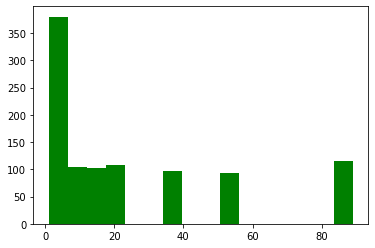

In [46]:
plt.hist(sample, 16, density = False, color = 'green')
plt.show()

Посчитайте среднее:

In [48]:
np.mean(sample)

24.173

Посчитайте дисперсию:

In [50]:
np.nanvar(sample)

797.145071

Посчитайте медиану:

In [53]:
statistics.median(sample)

13.0

### Уровень 1

#### Задание 3

Пусть брошены 3 уравновешенные монеты.  
Рассмотрим 3 события:  
A1 - монеты 1 и 2 упали одной и той же стороной,  
A2 - монеты 2 и 3 упали одной и той же стороной,  
A3 - монеты 1 и 3 упали одной и той же стороной.  
Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

Создадим dataframe исходов, где 0 - орел, 1 - решка.

In [57]:
data = {'coin_1' : [0, 1, 0, 0, 1, 1, 0, 1],
        'coin_2' : [0, 0, 1, 0, 1, 0, 1, 1],
        'coin_3' : [0, 0, 0, 1, 0, 1, 1, 1],
        'event_A1' : ['A1', '-', '-', 'A1', 'A1', '-', '-', 'A1'],
        'event_A2' : ['A2', 'A2', '-', '-', '-', '-', 'A2', 'A2'],
        'event_A3' : ['A3', '-', 'A3', '-', '-', 'A3', '-', 'A3']}
data = pd.DataFrame(data)

In [58]:
data

,coin_1,coin_2,coin_3,event_A1,event_A2,event_A3
0,0,0,0,A1,A2,A3
1,1,0,0,-,A2,-
2,0,1,0,-,-,A3
3,0,0,1,A1,-,-
4,1,1,0,A1,-,-
5,1,0,1,-,-,A3
6,0,1,1,-,A2,-
7,1,1,1,A1,A2,A3


На примере событий А1 и А2 покажем, что всего возможно 4 исхода:
* когда не произошло ни одно из событий (строки с индексом 2 и 5);
* когда произошло событие А1, но не произошло событие А2 (строки 3 и 4);
* когда произошло событие А2, но не произошло событие А1 (строки 1 и 6);
* когда произошли оба события (строки 0 и 7). 

Вероятность наступления события A1: $P(A1) = \frac{1}{2} $.  
Вероятность наступления события A2 : $P(A2) = \frac{1}{2} $.  
Вероятность наступления события А1 и А2:  $P(A1 \cdot A2) = P(A1) \cdot P(A2) = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4} $ . 

Наступление события А1 не влияет на событие А2. Наступление события А2 не влияет на событие А1.   
Аналогичные рассуждения возможны пары событий А2 и А3, а также для А1 и А3.  
Однако, при совместном анализе событий А1, А2, А3 получаем, что, например, если событие А1 и А2 произошли (строки 0 и 7), то в этом случае событие А3 всегда происходит, те это событие становится достоверным.   
Если события А1 и А2 не произошли (строки 2 и 5), то событие А3 происходит, те оно становится достоверным.  
При этом, если произошло событие А1 и не произошло событие А2 (или наоборот), то событие А3 становится невозможным.  
Таким образом, вероятность наступления события А3 зависит от совместного наступления событий А1 и А2, а следовательно, эти собыятия не являются независимыми в совокупности.

#### Задание 4 (формула полной вероятности)

В магазин привезли устройства с 3-х разных предприятий. Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

Обозначим $H_1, H_2, H_3$ события, состоящие в том, что устройство принадлежит первому, второму и третьему предприятию соответственно. Тогда их вероятности равны:  

$P(H_1) = \frac {2}{10}$,

$P(H_2) = \frac {3}{10}$,

$P(H_3) = \frac {5}{10}$.


Событие А - купленное устройство - высшего сорта. Тогда условные вероятности события А равны:  

$P(A|H_1) = \frac {10}{100}$, 

$P(A|H_2) = \frac {5}{100}$, 

$P(A|H_3) = \frac {20}{100}$.


Согласно формуле полной вероятности, найдем:

$P(A) = \frac {2}{10} \cdot \frac {10}{100} + \frac {3}{10} \cdot \frac {5}{100} + \frac {5}{10} \cdot \frac {20}{100} = 0,02 + 0,015 + 0,1 =0,135 $